<h1> Project 2 - Comcast Telecom Consumer Complaints</h1>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

<b>1. Import data into Python environment.</b>

In [3]:
comcast_data = pd.read_csv('/home/labsuser/Datasets/Comcast_telecom_complaints_data.csv')
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


<b>2. Provide the trend chart for the number of complaints at monthly and daily granularity levels.</b>

Analysis: During the Month of April, May and June the number of complaints has tremendously increased. The complaints are maximum during the Month of June

In [20]:
#grp = comcast_data.groupby(['Month','Day'])['Status'].count()

<b>Monthly Trend</b>

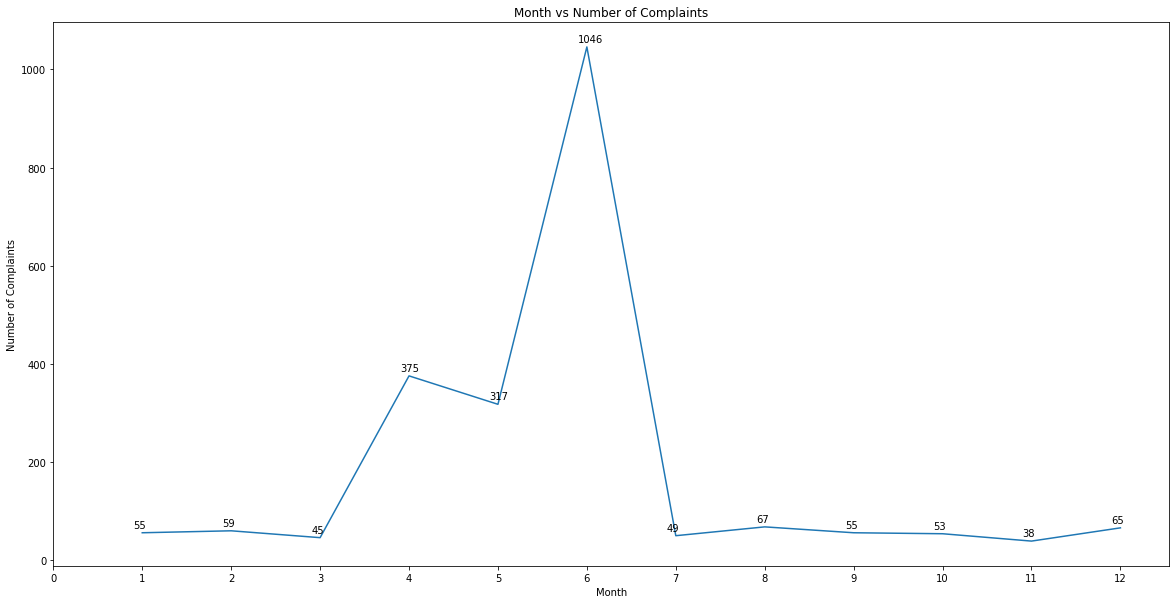

In [18]:
comcast_data['Month'] = pd.DatetimeIndex(comcast_data['Date_month_year']).month
comcast_data['Day'] = pd.DatetimeIndex(comcast_data['Date_month_year']).day
grpd_by_month = comcast_data.groupby('Month')
month_wise_df = pd.DataFrame(grpd_by_month.Month.count())
plt.figure(figsize=(20,10))
plt.title('Month vs Number of Complaints')
plt.plot(month_wise_df.index, month_wise_df['Month'])
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(np.arange(0,13,1))
for x,y in zip(month_wise_df.index, month_wise_df['Month']):
    plt.annotate(str(y), (x,y), (x-0.1,y+10))
plt.show()

<b>Daily Trend</b>

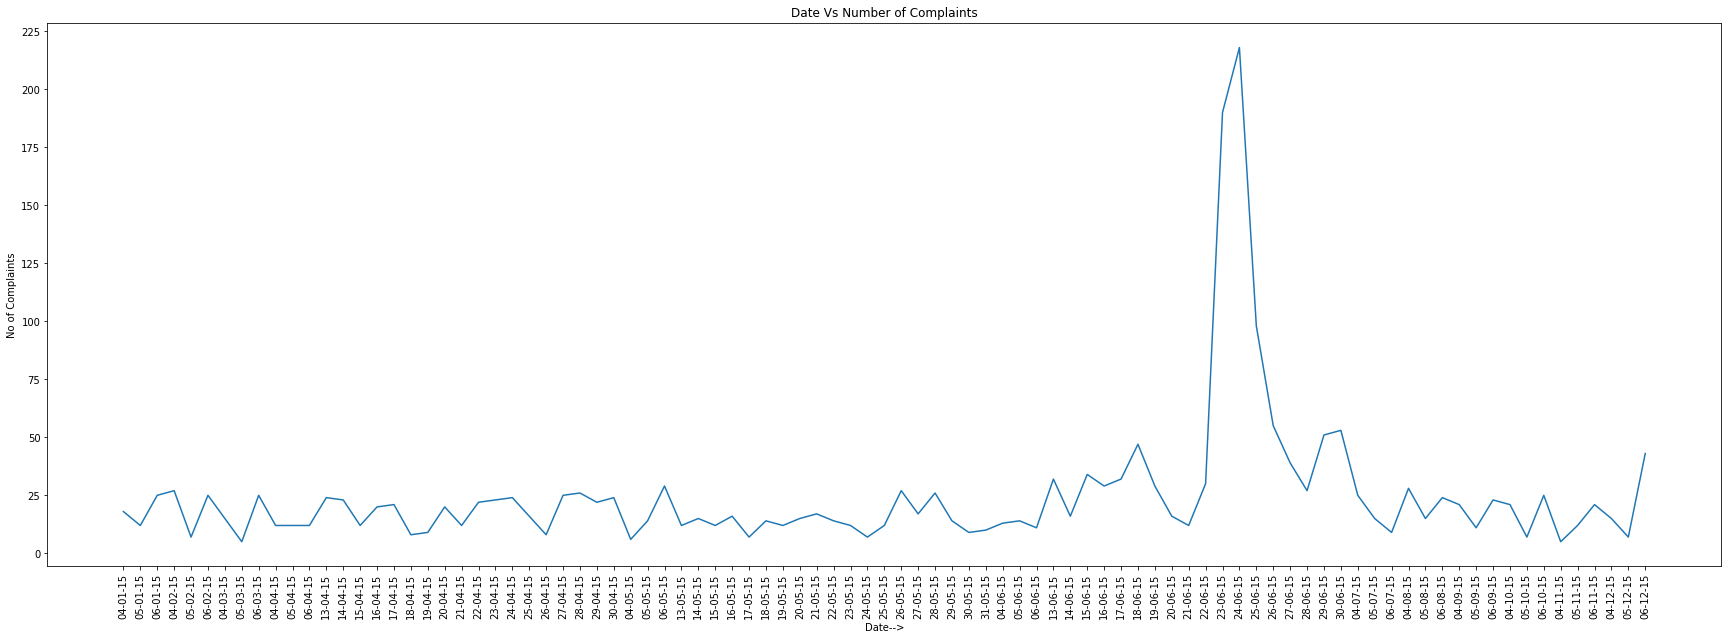

In [21]:
grp_dmy = comcast_data.groupby('Date_month_year')
day_wise_filter_df = pd.DataFrame(grp_dmy['Customer Complaint'].agg(len))
day_wise_filter_df.index = pd.to_datetime(day_wise_filter_df.index)
day_wise_filter_df = day_wise_filter_df.sort_index()
day_wise_filter_df.index = day_wise_filter_df.index.strftime('%d-%m-%y')
plt.figure(figsize=(30,10))
plt.title('Date Vs Number of Complaints')
plt.plot(day_wise_filter_df.index,day_wise_filter_df['Customer Complaint'])
plt.xlabel('Date-->')
plt.ylabel('No of Complaints')
plt.xticks(range(0,len(day_wise_filter_df.index)), day_wise_filter_df.index, rotation=90)
plt.yticks(np.arange(0,250,25))
#for x,y in zip(day_wise_filter_df.index, day_wise_filter_df['Customer Complaint']):
    #plt.annotate(str(y), (x,y), (x,y))
plt.show()

<b>3. Provide a table with the frequency of complaint types</b>

In [12]:
grp_comp = comcast_data.groupby('Customer Complaint')
frequency_compliants_df = pd.DataFrame(grp_comp['Status'].count())
frequency_compliants_df.rename(columns={'Status': 'Frequency'}, inplace=True)
frequency_compliants_df = frequency_compliants_df.sort_values(by='Frequency',ascending=False)
frequency_compliants_df

,Frequency
Customer Complaint,
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11
...,...
Comcast internet speeds extremely slow,1
Comcast internet speeds,1
Comcast internet service that I was NEVER able to use,1


In [13]:
grp_freq = frequency_compliants_df.groupby('Frequency')
freq_comp_count_df = pd.DataFrame(grp_freq['Frequency'].count())
freq_comp_count_df.rename(columns={'Frequency':'Number of Complaints'}, inplace=True)
freq_comp_count_df

,Number of Complaints
Frequency,
1,1725
2,63
3,18
4,12
5,4
6,5
8,6
9,1
11,3


<b>4. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.</b>

In [29]:
comcast_data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [30]:
comcast_data['Categorized_Status'] = comcast_data.Status
comcast_data['Categorized_Status'].replace('Solved', 'Closed', inplace=True)
comcast_data['Categorized_Status'].replace('Pending', 'Open', inplace=True)

In [31]:
print(comcast_data[comcast_data.Categorized_Status=='Closed'].shape)
print(comcast_data[comcast_data.Categorized_Status=='Open'].shape)

(1707, 14)
(517, 14)


<b> 5. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:</b>

<b> 5.1 Which state has the maximum complaints</b>

<b> 5.2 Which state has the highest percentage of unresolved complaints</b>

In [43]:
states_list = comcast_data.State.unique()
listOfAlldata=[]
for state in states_list:
    freshlist=[]
    freshlist.append(state)
    Opencount = comcast_data[(comcast_data.State == state) & (comcast_data.Categorized_Status=='Open')].State.count()
    Closedcount = comcast_data[(comcast_data.State == state) & (comcast_data.Categorized_Status=='Closed')].State.count()
    TotalCount = Opencount + Closedcount
    Percentage_Open = (Opencount/TotalCount)*100
    Percentage_Closed = (Closedcount/TotalCount)*100
    freshlist.append(Closedcount)
    freshlist.append(Opencount) 
    freshlist.append(TotalCount) 
    freshlist.append(round(Percentage_Open,2))
    freshlist.append(round(Percentage_Closed,2))
    listOfAlldata.append(freshlist)
#listOfAlldata
new_df = pd.DataFrame(listOfAlldata, columns=['StateName', 'ClosedCount', 'OpenCount', 'TotalCount', '% Open', '% Closed'])
new_df = new_df.sort_values(by='StateName')
new_df.head()

,StateName,ClosedCount,OpenCount,TotalCount,% Open,% Closed
17,Alabama,17,9,26,34.62,65.38
37,Arizona,14,6,20,30.00,70.00
33,Arkansas,6,0,6,0.00,100.00
3,California,159,61,220,27.73,72.27
15,Colorado,58,22,80,27.50,72.50


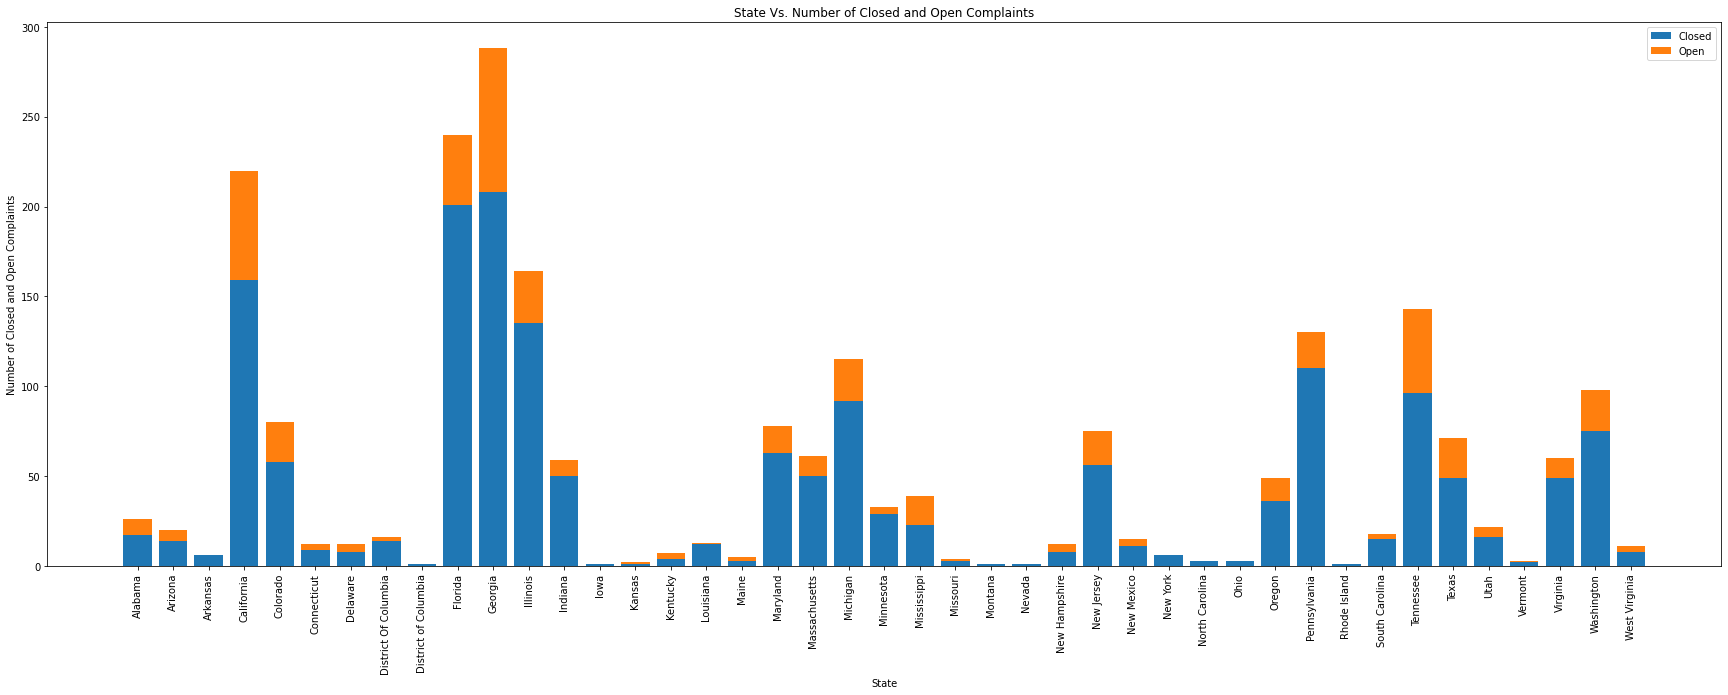

In [44]:
plt.figure(figsize=(30, 10))
plt.title('State Vs. Number of Closed and Open Complaints')
plt.bar(new_df.StateName, new_df.ClosedCount, label='Closed')
plt.bar(new_df.StateName, new_df.OpenCount,bottom=new_df.ClosedCount,label='Open')
plt.xticks(range(0, len(new_df.index)), new_df.StateName, rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Closed and Open Complaints')
plt.legend()
plt.show()

In [35]:
#5.1 Solution
new_df.sort_values(by='TotalCount',ascending=False, inplace=True)
print(new_df.head(1)['StateName'].values, "State has the highest number of Complaints")

['Georgia'] State has the highest number of Complaints


In [36]:
#5.2 Solution
new_df.sort_values(by='% Open',ascending=False,inplace=True)
print(new_df.head(1)['StateName'].values, "State has the highest percentage of Unresolved Complaints")
#new_df

['Kansas'] State has the highest percentage of Unresolved Complaints


<b> 6. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.</b>

In [37]:
comcast_data['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [38]:
closed_Internet = comcast_data[(comcast_data['Received Via']=='Internet') & (comcast_data['Categorized_Status']=='Closed')].Categorized_Status.count()
open_Internet = comcast_data[(comcast_data['Received Via']=='Internet') & (comcast_data['Categorized_Status']=='Open')].Categorized_Status.count()
closed_customercare = comcast_data[(comcast_data['Received Via']=='Customer Care Call') & (comcast_data['Categorized_Status']=='Closed')].Categorized_Status.count()
open_customercare = comcast_data[(comcast_data['Received Via']=='Customer Care Call') & (comcast_data['Categorized_Status']=='Open')].Categorized_Status.count()
percentage_resolved_Internet = (closed_Internet/(open_Internet+closed_Internet))*100
percentage_resolved_CustomerCare = (closed_customercare/(open_customercare+closed_customercare))*100
print("Percentage of complaints resolved which were reported via Internet is", round(percentage_resolved_Internet,2),"%")
print("Percentage of complaints resolved which were reported via Customer Care is", round(percentage_resolved_CustomerCare,2),"%")

Percentage of complaints resolved which were reported via Internet is 76.29 %
Percentage of complaints resolved which were reported via Customer Care is 77.21 %
